<a href="https://colab.research.google.com/github/vikrantIIITD2024/FashionAI/blob/main/Blah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pillow-avif-plugin

In [ ]:
import pandas as pd
from PIL import Image
import pillow_avif
import numpy as np
from IPython.display import display

In [ ]:
%load_ext google.colab.data_table
df_acc = pd.read_excel("/content/drive/MyDrive/META DATASET/xlsx/Accessories.xlsx")
df_dress = pd.read_excel("/content/drive/MyDrive/META DATASET/xlsx/outfits.xlsx")
df_foot = pd.read_excel("/content/drive/MyDrive/META DATASET/xlsx/footwears.xlsx")
df_acc

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Category,Gender,Occasion,Region,Age Group,Silver,Golden,Red,pink,Blue,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Anklet,F,casual,all,15-25,a1.avif,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anklet,F,casual,all,20-30,0,a2.avif,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anklet,F,Wedding,all,20-40,a3.avif,a3.avif,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anklet,F,Festivals,all,20-40,a3.avif,a3.avif,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anklet,F,Party,all,20-40,a3.avif,a3.avif,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Bracelet,M,casual,all,20-40,a22.avif,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,Bracelet,M,Party,all,20-40,a10.avif,a10.avif,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,Bracelet,M,casual,all,20-50,a11.avif,0,0,0,a11.avif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,Bracelet,M,casual,all,20-30,a12.avif,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
def loadImages(names):
  base = '/content/drive/MyDrive/META DATASET/Accessories/'
  img = Image.open(base+names)
  display(img)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
trainImages = []
trainLabel = []
for i in range(len(imagesDataSet)-4):
  trainImages.append(np.array(imagesDataSet[i][0]))
  trainLabel.append(imagesDataSet[i][1])

In [ ]:
targetShape = (850, 850)
print(targetShape)
bleh = []
for img in trainImages:
  i = tf.image.resize(img, targetShape)
  bleh.append(i)

(850, 850)


In [ ]:
BATCH_SIZE=5
BUFFER_SIZE=20

tfDf = tf.data.Dataset.from_tensor_slices(bleh).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

<_BatchDataset element_spec=TensorSpec(shape=(None, 850, 850, 3), dtype=tf.float32, name=None)>

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

tf.Tensor(
[[-1.8262563   0.15891856 -0.56795454  0.5141647   0.89872164 -0.93455017
   0.11471412  0.13812289  0.59890413  0.70763135 -0.73549247  2.6296568
  -0.3584492  -0.9480258  -0.6590002   0.33311448 -0.4519917  -0.2679593
   0.5301592   1.6159211   0.24030757 -0.9744661   0.22681531 -0.6202047
   0.38858527 -1.1840699   0.5605902  -1.4464312  -0.09995864  0.14184007
  -0.63591576  1.0031377   0.07059771  0.7188106  -0.6206258  -0.16234171
   1.1363355  -0.42836645 -0.32914492  0.9740708  -0.7924881  -0.15775281
  -0.22389399 -0.22251806 -1.3405844  -0.495194   -0.41126907  1.1910446
   2.2537847   0.3440955  -0.04643138  0.68293715 -1.0412748  -0.8863243
   0.35971066 -0.29525614  0.92071146 -0.15905403  0.21024416  0.19279939
  -0.88930804 -0.48597878 -1.172062   -0.19484575 -1.4975108  -0.83538634
   0.36560324 -1.2943252   1.7864945  -1.3047378   0.74008894  1.2290285
   0.11522479  1.5780944   0.14476421 -0.50462174 -1.3655558   1.2901943
   2.3963406   1.636928    0.58706

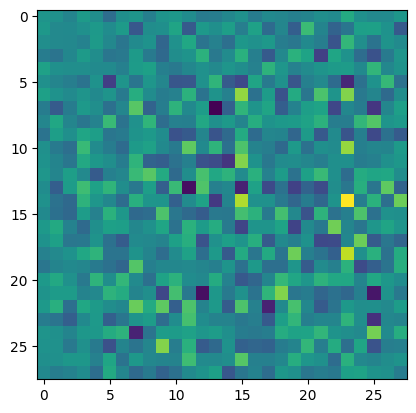

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
print(noise)
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
!pip install nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('state_union')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import re

In [ ]:
def extract_gender(text):
    male_terms = set([
        "male", "man", "boy", "men", "guy", "gentleman", "sir", "he", "his",
        "him", "mr", "father", "dad", "son", "brother", "uncle", "grandfather",
        "nephew", "husband", "boyfriend", "king", "prince", "king", "sir", "mr"
    ])

    female_terms = set([
        "female", "woman", "girl", "women", "lady", "she", "her", "hers", "mrs",
        "miss", "ms", "mother", "mom", "daughter", "sister", "aunt", "grandmother",
        "niece", "wife", "girlfriend", "queen", "princess", "madam", "ma'am", "misses"
    ])

    # Tokenize the input text
    tokens = word_tokenize(text.lower())

    # Check if any male term is present
    if any(term in tokens for term in male_terms):
        return "M"
    # Check if any female term is present
    elif any(term in tokens for term in female_terms):
        return "F"
    else:
        return "Unknown"

def main(sample_text):
  # Define lists for regions, age groups, and occasions
  regions_in_india = ["delhi", "maharashtra", "chennai","south-india","kolkata", "bangalore", "hyderabad", "jaipur", "lucknow", "chandigarh"]
  clothExtract = {
    'shoes': 'footwear',
    'boots': 'footwear',
    'sneakers': 'footwear',
    'sandals': 'footwear',
    'flip-flops': 'footwear',
    'slippers': 'footwear',
    'heels': 'footwear',
    'flats': 'footwear',
    'loafers': 'footwear',
    'footwear': 'footwear',
    'dress':'dress',
    'gown': 'dress',
    'frock': 'dress',
    'attire': 'dress',
    'outfit': 'dress',
    'garment': 'dress',
    'apparel': 'dress',
    'ensemble': 'dress',
    'robe': 'dress',
    'clothing': 'dress',
    'suit': 'dress',
    'jewelry': 'accessories',
    'handbag': 'accessories',
    'purse': 'accessories',
    'wallet': 'accessories',
    'belt': 'accessories',
    'scarf': 'accessories',
    'hat': 'accessories',
    'glasses': 'accessories',
    'sunglasses': 'accessories',
    'watch': 'accessories',
    'accessories':'accessories'}
  clothType = ["footwear", "dress", "accessories"]
  age_groups = {
      "teenager": (13, 17),
      "young adult": (18, 25),
      "pre-adult": (25, 35),
      "adult": (35, 45),
      "elder": (45, 55),
      "old": (55, 65)
  }

  categories = ["ethnics", "sarees", "kurtas", "casuals", "one-piece", "suit",
                "lehenga-choli", "gym", "anklet", "bracelet", "neckless",
                "jewellery", "watches", "sunglasses", "work", "sports",
                "formals", "boots", "sneakers", "winter", "heels"]



  occasions = ["durgapooja", "diwali", "groom", "wedding", "onam", "eid", "party",
               "pongal", "interview", "farewell", "sports",
               "walking", "running", "college", "lohri",
               "work", "karva-chauth", "office", "meeting", "conference",]

  # Sample text
  # sample_text = "A boy looking for college outfit in Delhi Region"


  bodyType = ["ectomorph", "mesomorph" ,"endomorph"]

  if ("durga pooja" in sample_text.lower()):
    print("Found durga pooja")
    newsample = ""
    words = sample_text.lower().split()
    print(f"words: {words}")
    for i in range(len(words)):
      try:
        if (words[i] == 'durga' and words[i+1] == 'pooja'):
          newsample += words[i]+words[i+1] + " "
        elif (words[i] == 'pooja' and words[i-1] == 'durga'):
          continue
        else:
          newsample += words[i] + " "
      except Exception as e:
        print(f"e: {e}")
    print(f"newsample: {newsample}")
    sample_text = newsample
  # Tokenize the text
  tokens = word_tokenize(sample_text.lower())

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  # print("filtered tokens: ", filtered_tokens)

  # Part-of-speech tagging
  tagged_words = pos_tag(filtered_tokens)
  print("tagged words: ",tagged_words)

  # Initialize variables
  region = "any"
  age_group = (18,25)
  occasion = "any"
  gender = None
  bodyType = "Mesomorph"
  cat = "any"
  sheet = "dress"

  # Extract information based on part-of-speech tags
  for word, tag in tagged_words:
      if word in clothExtract.keys():
        sheet = clothExtract[word]
      if (word in city_states.keys() and city_states[word] in regions_in_india):
          region = city_states[word]
      if word in regions_in_india:
          region = word
      elif word in occasions:
          occasion = word
      elif word in bodyType:
          bodyType = word
      if word in categories:
        cat = word

  gender = extract_gender(sample_text)
  print("Got gender", gender)



  # Check for specific phrases and map them to age groups
  # age group check flaw
  if "young" in sample_text:
      age_group = age_groups["young adult"]
  elif "young-old" in sample_text:
      age_group = age_groups["pre-adult"]
  else:
    # Convert the list of keywords to a space-separated string
    text = sample_text

    # Define a regular expression pattern to match the age
    age_pattern = r'\b\d+\b'

    # Use re.findall to find all occurrences of the pattern in the text
    ages = re.findall(age_pattern, text)

    # If there are multiple occurrences, you can take the first one
    if ages:
        age = int(ages[0])
        # print(f"The age is: {age} years old")
        for i in age_groups.values():
          print(f"Got values: {i}")
          if (age >= i[0] and age < i[1]):
            # age_group = list(age_groups.keys())[list(age_groups.values()).index(i)]
            age_group = (i[0], i[1])
            # print(f"Setting age_group: {age_group}")
            break
    else:
        print("No age found in the text")

  # Print the extracted information
  print("Req: ", sheet)
  print("Region:", region)
  print("Age Group:", age_group)
  print("Occasion:", occasion)
  print("Gender:", gender)
  print("Category: ", cat)
  return [sheet, region, age_group, occasion, gender, cat]

In [ ]:
def filter(params, df):
  print(f"region: {params[1].capitalize()}, occassion: {params[3].capitalize()}, gender: {params[4]}, cat: {params[5].capitalize()}")
  answer = pd.DataFrame()
  # answer = df[(df["Region"].isin([params[0].capitalize()]) & (params[2].capitalize() == df["Occasion"]) & (df["Gender"] == params[3]))]
  for i in range(len(df)):
    # print(f"Got row: region: {df.loc[i, 'Region']}, occ: {df.loc[i, 'Occasion']}, gender: {df.loc[i, 'Gender']}")
    if (df.loc[i, "Region"].capitalize() == params[1].capitalize() or df.loc[i, "Region"] == 'all'):
      # print("correct region")
      if (df.loc[i, "Occasion"].capitalize() == params[3].capitalize() or df.loc[i, "Occasion"] == "all"):
        # print("correct occasion")
        if (df.loc[i, "Gender"] == params[4]):
          # print("Correct gender")
          if (df.loc[i, "Category"].capitalize() == params[5].capitalize() or params[5].capitalize() == "Any"):
            # print("Got row: ", df.loc[i])
            answer = answer.append([df.loc[i]])
  # print("Got answer: ", answer)
  return answer

In [ ]:
def extractImages(df):
  imageNames = []
  nonzero= df[df != 0].stack().values
  # print(nonzero)
  for i in nonzero:
    if (i.endswith(".jpg") and i not in imageNames):
      imageNames.append(i)
  return imageNames

In [ ]:
import urllib.request

In [97]:
def urlLoadImages(urls):
    filename = '/content/ranfile.jpg'
    with urllib.request.urlopen(urls) as url:
        with open(filename, 'wb') as f:
            f.write(url.read())

    img = Image.open(filename)

    display(img)

In [ ]:
import numpy as np

Enter prompt: A man wants jewellery
tagged words:  [('man', 'NN'), ('wants', 'VBZ'), ('jewellery', 'NN')]
Got gender M
No age found in the text
Req:  dress
Region: any
Age Group: (18, 25)
Occasion: any
Gender: M
Category:  jewellery
using the dress dataset
region: Any, occassion: Any, gender: M, cat: Jewellery
Previous empty so using entire dataset
Got image names:  ['https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/24954752/2023/9/28/373ca967-22a6-4223-859e-29271defd7641695917897722IndoEraGreenFloralPrintLivaFitFlareDress1.jpg', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/24446074/2023/8/10/9a5e35b7-cb9b-4cf0-a9cf-46d5a6c9d85c1691679668836EthnicDresses1.jpg', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/24564942/2023/8/19/8af62570-4ad1-44de-bd5e-abea7050fd9a1692450353170SAABHIWomenBlueEthnicMotifsPrintedGottaPattiFloralAnarkaliKu1.jpg', 'https://assets.myntassets.com/dpr

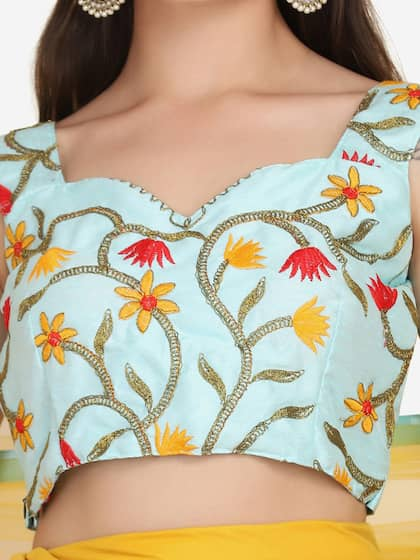

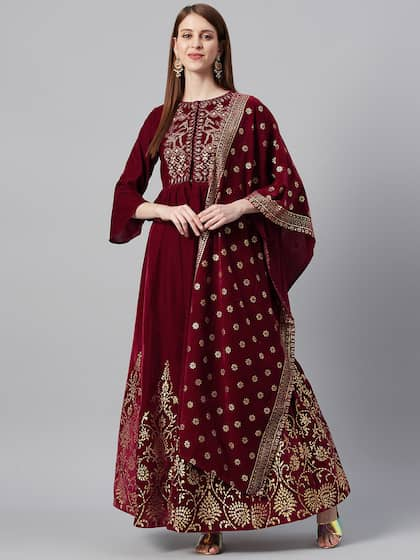

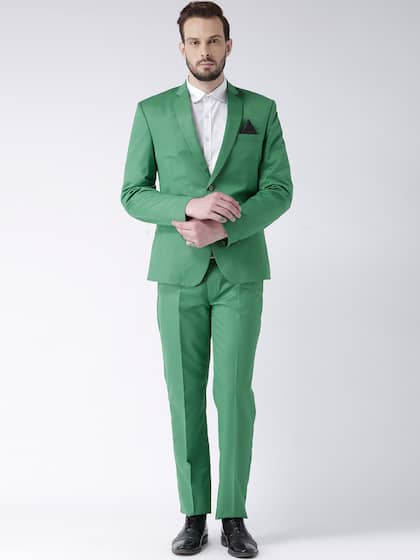

Are you satisfied(yes/no): yes


In [99]:
# print(df.head())
usedf = None
curGen = None

while(True):
  prompt = input("Enter prompt: ")
  params = main(prompt)
  if (params[4] == 'Unknown' and curGen != None):
    params[4] = curGen
  elif (params[4] == 'Unknown' and curGen == None):
    print("Please specify the gender you want to look for next time")
    break
  else:
    curGen = params[4]
  # print(f"df2.head: {df2}")
  # print(params)
  if (params[0] == 'footwear'):
    print("using the footwear dataset")
    usedf =  df_foot
  if (params[0] == 'dress'):
    print("using the dress dataset")
    usedf = df_dress
  if (params[0] == 'accessories'):
    print("using the acc dataset")
    usedf = df_acc
  # print("Now usedf is: ", usedf.head())
  adf = filter(params, usedf)
  if (len(adf) == 0):
    print("Previous empty so using entire dataset")
    adf = usedf
  recImages = extractImages(adf)
  print("Got image names: ", recImages)
  # imgfiles = loadImages(recImages)
  # # for i in imgfiles:
  # #   display(i)
  if (len(recImages) == 0):
    print("No Images for this")
  elif (len(recImages) < 3):
    for i in len(recImages):
      if (i.endswith("avif")):
        loadImages(i)
      else:
        urlLoadImages(i)
  else:
    loadimagelist = np.random.choice(recImages, size=3)
    for i in loadimagelist:
      if (i.endswith("avif")):
        loadImages(i)
      else:
        urlLoadImages(i)
  ch = input("Are you satisfied(yes/no): ")
  if (ch == "yes"):
    break

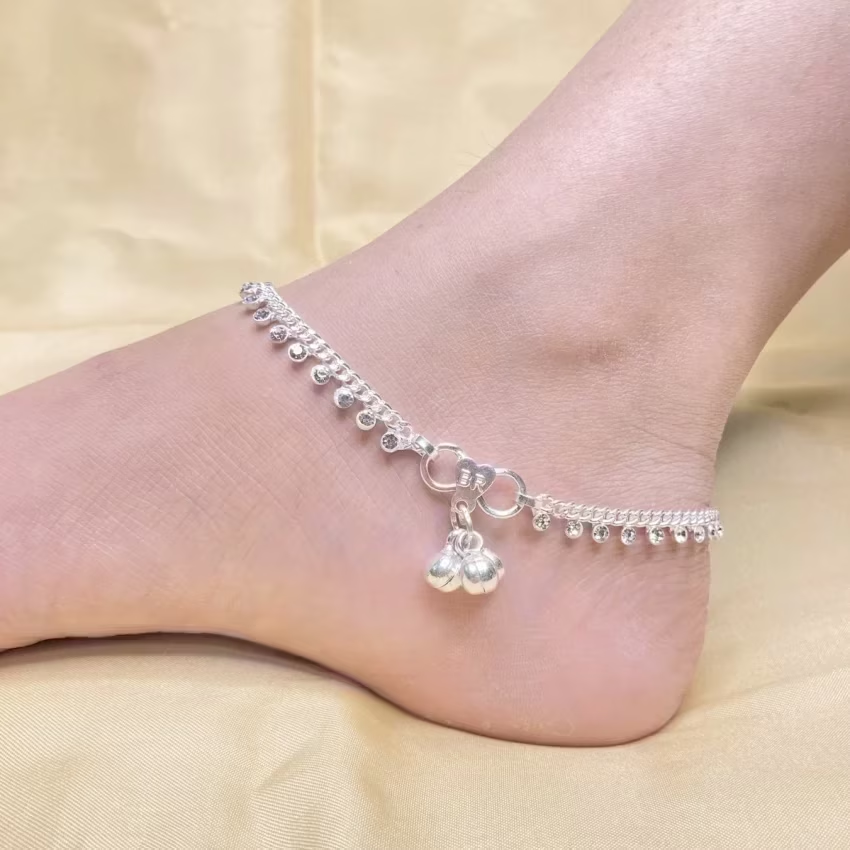

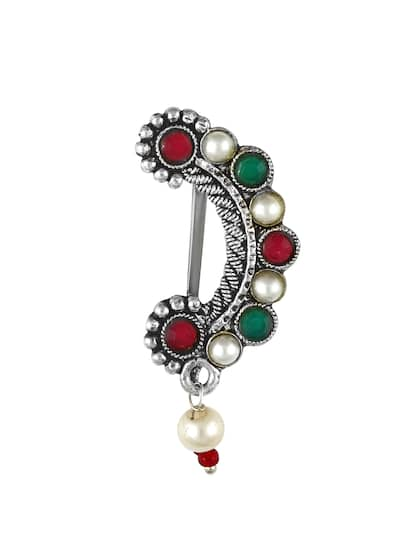

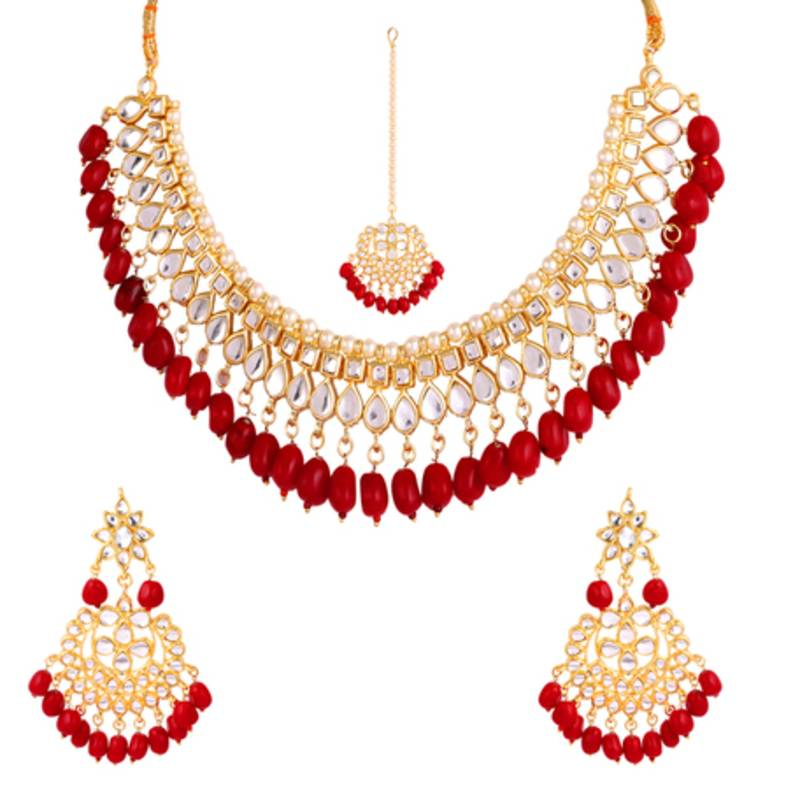

In [98]:
loadimagelist = ['a1.avif', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/23409562/2023/5/26/2c875184-6115-4090-8ff3-992062aef80d1685075419883Nosepin1.jpg',
                 '29.avif']
for i in loadimagelist:
      if (i.endswith("avif")):
        loadImages(i)
      else:
        urlLoadImages(i)

# **Extracting Gender out of input text**


In [ ]:
from nltk.tokenize import word_tokenize

def extract_gender(text):
    male_terms = set([
        "male", "man", "boy", "men", "guy", "gentleman", "sir", "he", "his",
        "him", "mr", "father", "dad", "son", "brother", "uncle", "grandfather",
        "nephew", "husband", "boyfriend", "king", "prince", "king", "sir", "mr"
    ])

    female_terms = set([
        "female", "woman", "girl", "women", "lady", "she", "her", "hers", "mrs",
        "miss", "ms", "mother", "mom", "daughter", "sister", "aunt", "grandmother",
        "niece", "wife", "girlfriend", "queen", "princess", "madam", "ma'am", "misses"
    ])

    # Tokenize the input text
    tokens = word_tokenize(text.lower())

    # Check if any male term is present
    if any(term in tokens for term in male_terms):
        return "M"
    # Check if any female term is present
    elif any(term in tokens for term in female_terms):
        return "F"
    else:
        return "Unknown"

# Example usage:
input_text = "A man looking for outfit"
gender = extract_gender(input_text)
print("Gender:", gender)


Gender: M


# Sample Prompts
- I want a cool new outfit for diwali (done)
- I am a guy living in delhi and I am looking for casual footwear (Done)
- I am a lady living in mumbai and I am looking for formal footwear (done)
- I am a girl living in pune and I am looking for formal outfit (done)
- I am a girl living in pune and I am looking accessories to match with my party wear. (done)
- A man living in south-india is looking for an onam dress (done)
- A young guy is looking for a casual college outfit (done)
- A young lady is looking for a formal outfit for office (done)
- I am a middle-aged man looking for casual comfortable footwear (done)
- A college going boy looking for accessories.


# **Extracting Region from the input text**

In [ ]:
delhi = [
    'Chattarpur',
    'Vasant Kunj',
    'Najafgarh',
    'Saket',
    'Dwarka',
    'Connaught Place',
    'Karol Bagh',
    'Rohini',
    'Lajpat Nagar',
    'Mayur Vihar',
    'Hauz Khas',
    'Paharganj',
    'Malviya Nagar',
    'Pitampura',
    'Green Park',
    'Sarita Vihar',
    'Shahdara',
    'Janakpuri',
    'Noida',
    'Gurgaon'
]
punjab = [
    'Amritsar',
    'Ludhiana',
    'Jalandhar',
    'Patiala',
    'Bathinda',
    'Hoshiarpur',
    'Mohali',
    'Pathankot',
    'Moga',
    'Abohar',
    'Faridkot',
    'Firozpur',
    'Gurdaspur',
    'Kapurthala',
    'Malerkotla',
    'Mansa',
    'Muktsar',
    'Nawanshahr',
    'Phagwara',
    'Sangrur'
]
haryana = [
    'Chandigarh',
    'Faridabad',
    'Gurgaon',
    'Panipat',
    'Ambala',
    'Yamunanagar',
    'Rohtak',
    'Hisar',
    'Karnal',
    'Sonipat',
    'Panchkula',
    'Bhiwani',
    'Sirsa',
    'Jind',
    'Thanesar',
    'Kaithal',
    'Rewari',
    'Palwal',
    'Jagadhri',
    'Ambala Cantonment'
]
rajasthan = [
    'Jaipur',
    'Jodhpur',
    'Udaipur',
    'Ajmer',
    'Kota',
    'Bikaner',
    'Alwar',
    'Bharatpur',
    'Sikar',
    'Pali',
    'Ganganagar',
    'Bhilwara',
    'Kishangarh',
    'Barmer',
    'Tonk',
    'Banswara',
    'Nagaur',
    'Sawai Madhopur',
    'Chittorgarh',
    'Dholpur'
]
gujarat = [
    'Ahmedabad',
    'Surat',
    'Vadodara',
    'Rajkot',
    'Bhavnagar',
    'Jamnagar',
    'Junagadh',
    'Gandhinagar',
    'Anand',
    'Bharuch',
    'Porbandar',
    'Nadiad',
    'Gandhidham',
    'Navsari',
    'Valsad',
    'Mehsana',
    'Surendranagar',
    'Bhuj',
    'Gandeva',
    'Palanpur'
]
maharashtra = [
    'Mumbai',
    'Pune',
    'Nagpur',
    'Thane',
    'Nashik',
    'Aurangabad',
    'Solapur',
    'Amravati',
    'Nanded',
    'Kolhapur',
    'Sangli',
    'Jalgaon',
    'Akola',
    'Latur',
    'Dhule',
    'Ahmednagar',
    'Chandrapur',
    'Parbhani',
    'Jalna',
    'Ichalkaranji'
]

south_india = {
    'karnataka': [
        'Bangalore',
        'Mysore',
        'Hubli',
        'Mangalore',
        'Belgaum',
        'Davanagere',
        'Bellary',
        'Gulbarga',
        'Shimoga',
        'Tumkur',
        'Udupi',
        'Hassan',
        'Bidar',
        'Hospet',
        'Raichur',
        'Dharwad',
        'Kolar',
        'Mandya',
        'Chitradurga',
        'Chikmagalur'
    ],
    'tamil_nadu': [
        'Chennai',
        'Coimbatore',
        'Madurai',
        'Tiruchirappalli',
        'Salem',
        'Tirunelveli',
        'Vellore',
        'Thoothukudi',
        'Nagercoil',
        'Thanjavur',
        'Dindigul',
        'Cuddalore',
        'Erode',
        'Hosur',
        'Tiruppur',
        'Kancheepuram',
        'Karur',
        'Namakkal',
        'Ramanathapuram',
        'Pollachi'
    ],
    'telangana': [
        'Hyderabad',
        'Warangal',
        'Nizamabad',
        'Karimnagar',
        'Ramagundam',
        'Khammam',
        'Mahbubnagar',
        'Nalgonda',
        'Adilabad',
        'Siddipet',
        'Miryalaguda',
        'Jagtial',
        'Nirmal',
        'Kothagudem',
        'Suryapet',
        'Wanaparthy',
        'Mancherial',
        'Kagaznagar',
        'Bhongir',
        'Vikarabad'
    ],
    'south-india' : [
        'south-india'
    ],
    'kerela' : [
        'thiruvananthapuram',
        'cochin',
    ]
}

west_bengal = [
    'Kolkata',
    'Howrah',
    'Durgapur',
    'Asansol',
    'Siliguri',
    'Darjeeling',
    'Malda',
    'Jalpaiguri',
    'Kharagpur',
    'Haldia',
    'Berhampur',
    'Balurghat',
    'Raniganj',
    'Cooch Behar',
    'Alipurduar',
    'Purulia',
    'Bankura',
    'Medinipur',
    'Serampore',
    'Bardhaman'
]
bihar = [
    'Patna',
    'Gaya',
    'Bhagalpur',
    'Muzaffarpur',
    'Purnia',
    'Darbhanga',
    'Arrah',
    'Begusarai',
    'Katihar',
    'Chhapra',
    'Danapur',
    'Saharsa',
    'Hajipur',
    'Sasaram',
    'Bettiah',
    'Motihari',
    'Bagaha',
    'Kishanganj',
    'Jamalpur',
    'Buxar'
]
odisha = [
    'Bhubaneswar',
    'Cuttack',
    'Rourkela',
    'Brahmapur',
    'Puri',
    'Sambalpur',
    'Balasore',
    'Bhadrak',
    'Baripada',
    'Jeypore',
    'Jharsuguda',
    'Angul',
    'Bargarh',
    'Paradip',
    'Bhawanipatna',
    'Dhenkanal',
    'Barbil',
    'Kendujhar',
    'Jagatsinghpur',
    'Nayagarh'
]
madhya_pradesh = [
    'Bhopal',
    'Indore',
    'Jabalpur',
    'Gwalior',
    'Ujjain',
    'Sagar',
    'Dewas',
    'Satna',
    'Ratlam',
    'Rewa',
    'Katni',
    'Chhindwara',
    'Burhanpur',
    'Khandwa',
    'Morena',
    'Bhind',
    'Guna',
    'Shivpuri',
    'Damoh',
    'Mandsaur'
]
chhattisgarh = [
    'Raipur',
    'Bhilai',
    'Durg',
    'Bilaspur',
    'Korba',
    'Raigarh',
    'Jagdalpur',
    'Ambikapur',
    'Rajnandgaon',
    'Chirmiri',
    'Dhamtari',
    'Janjgir',
    'Kanker',
    'Kawardha',
    'Mahasamund',
    'Naila Janjgir',
    'Tilda Newra',
    'Bhatapara',
    'Mungeli',
    'Baloda Bazar'
]
assam = [
    'Guwahati',
    'Silchar',
    'Dibrugarh',
    'Jorhat',
    'Nagaon',
    'Tinsukia',
    'Tezpur',
    'Karimganj',
    'Sivasagar',
    'Barpeta',
    'Goalpara',
    'Dhubri',
    'Nalbari',
    'Diphu',
    'North Lakhimpur',
    'Bongaigaon',
    'Hailakandi',
    'Morigaon',
    'Dhemaji',
    'Kokrajhar'
]
arunachal_pradesh = [
    'Itanagar',
    'Naharlagun',
    'Tawang',
    'Bomdila',
    'Pasighat',
    'Khonsa',
    'Anini',
    'Roing',
    'Ziro',
    'Aalo',
    'Tezu',
    'Changlang',
    'Seppa',
    'Yingkiong',
    'Bhalukpong',
    'Daporijo',
    'Along',
    'Namsai',
    'Tuting',
    'Hayuliang'
]
manipur = [
    'Imphal',
    'Thoubal',
    'Bishnupur',
    'Churachandpur',
    'Senapati',
    'Ukhrul',
    'Jiribam',
    'Kakching',
    'Tamenglong',
    'Chandel',
    'Kangpokpi',
    'Noney',
    'Tengnoupal',
    'Pherzawl',
    'Kamjong',
    'Kangpokpi',
    'Jiribam',
    'Kakching',
    'Kangchup',
    'Samurou'
]
meghalaya = [
    'Shillong',
    'Tura',
    'Jowai',
    'Nongstoin',
    'Williamnagar',
    'Baghmara',
    'Resubelpara',
    'Khliehriat',
    'Mairang',
    'Nongpoh',
    'Amlarem',
    'Mawkyrwat',
    'Khonjoy',
    'Sohra',
    'Dawki',
    'Cherrapunji',
    'Jakrem',
    'Mendipathar',
    'Songsak',
    'Nongpoh'
]
mizoram = [
    'Aizawl',
    'Lunglei',
    'Saiha',
    'Champhai',
    'Serchhip',
    'Kolasib',
    'Lawngtlai',
    'Demagiri',
    'Thenzawl',
    'Hnahthial',
    'Khawhai',
    'N.Cachar Hills',
    'Saitual',
    'Aibawk',
    'Zawlnuam',
    'Biate',
    'Tlabung',
    'Tlangnuam',
    'Phullen',
    'Tlabung'
]
nagaland = [
    'Kohima',
    'Dimapur',
    'Mokokchung',
    'Tuensang',
    'Wokha',
    'Zunheboto',
    'Mon',
    'Phek',
    'Kiphire',
    'Longleng',
    'Peren',
    'Noklak',
    'Jalukie',
    'Chumukedima',
    'Zunheboto',
    'Tseminyu',
    'Pfutsero',
    'Chuchuyimlang',
    'Kohima Village',
    'Alichen'
]
goa = [
    'Panaji',
    'Margao',
    'Vasco da Gama',
    'Mapusa',
    'Ponda',
    'Calangute',
    'Curchorem',
    'Sanguem',
    'Bicholim',
    'Cuncolim',
    'Valpoi',
    'Canacona',
    'Quepem',
    'Colva',
    'Benaulim',
    'Dabolim',
    'Anjuna',
    'Pernem',
    'Arambol',
    'Mormugao'
]
andaman_nicobar = [
    'Port Blair',
    'Havelock Island',
    'Neil Island',
    'Diglipur',
    'Rangat',
    'Mayabunder',
    'Wandoor',
    'North Bay Island',
    'Little Andaman',
    'Car Nicobar',
    'Great Nicobar',
    'Long Island',
    'Baratang Island',
    'Campbell Bay',
    'Rangat',
    'Neil Island',
    'Diglipur',
    'Mangrove Creek',
    'Interview Island',
    'Hut Bay'
]
chandigarh = [
    'Chandigarh'
]
lakshadweep = [
    'Kavaratti',
    'Agatti',
    'Amini',
    'Andrott',
    'Bitra',
    'Chetlat',
    'Kadmat',
    'Kalpeni',
    'Kiltan',
    'Minicoy',
    'Bangaram',
    'Bithra',
    'Cheriyam',
    'Kavaratti',
    'Kadmat',
    'Kalpeni',
    'Kavaratti',
    'Kadmat',
    'Kavaratti',
    'Kadmat'
]
puducherry = [
    'Puducherry',
    'Karaikal',
    'Mahe',
    'Yanam'
]
dadra_nagar_haveli = [
    'Silvassa',
    'Dadra',
    'Nagar Haveli',
    'Dadra and Nagar Haveli'
]


In [ ]:
city_states = {}

# Creating the dictionary for Delhi
for city in delhi:
    city_states[city.lower()] = "delhi"

# Creating the dictionary for Punjab
for city in punjab:
    city_states[city.lower()] = "punjab"

# Creating the dictionary for Haryana
for city in haryana:
    city_states[city.lower()] = "haryana"

# Creating the dictionary for Rajasthan
for city in rajasthan:
    city_states[city.lower()] = "rajasthan"

# Creating the dictionary for Gujarat
for city in gujarat:
    city_states[city.lower()] = "gujarat"

# Creating the dictionary for Maharashtra
for city in maharashtra:
    city_states[city.lower()] = "maharashtra"

# Creating the dictionary for South India (Karnataka, Tamil Nadu, Telangana)
for state, cities in south_india.items():
    city_states[state] = 'south-india'
    for city in cities:
        city_states[city.lower()] = "south-india"

# Creating the dictionary for West Bengal
for city in west_bengal:
    city_states[city.lower()] = "west bengal"

# Creating the dictionary for Bihar
for city in bihar:
    city_states[city.lower()] = "bihar"

# Creating the dictionary for Odisha
for city in odisha:
    city_states[city.lower()] = "odisha"

# Creating the dictionary for Madhya Pradesh
for city in madhya_pradesh:
    city_states[city.lower()] = "madhya pradesh"

# Creating the dictionary for Chhattisgarh
for city in chhattisgarh:
    city_states[city.lower()] = "chhattisgarh"

# Creating the dictionary for Assam
for city in assam:
    city_states[city.lower()] = "assam"

# Creating the dictionary for Arunachal Pradesh
for city in arunachal_pradesh:
    city_states[city.lower()] = "arunachal pradesh"

# Creating the dictionary for Manipur
for city in manipur:
    city_states[city.lower()] = "manipur"

# Creating the dictionary for Meghalaya
for city in meghalaya:
    city_states[city.lower()] = "meghalaya"

# Creating the dictionary for Mizoram
for city in mizoram:
    city_states[city.lower()] = "mizoram"

# Creating the dictionary for Nagaland
for city in nagaland:
    city_states[city.lower()] = "nagaland"

# Creating the dictionary for Goa
for city in goa:
    city_states[city.lower()] = "goa"

# Creating the dictionary for Andaman and Nicobar Islands
for city in andaman_nicobar:
    city_states[city.lower()] = "andaman and nicobar islands"

# Creating the dictionary for Chandigarh
for city in chandigarh:
    city_states[city.lower()] = "chandigarh"

# Creating the dictionary for Lakshadweep
for city in lakshadweep:
    city_states[city.lower()] = "lakshadweep"

# Creating the dictionary for Puducherry
for city in puducherry:
    city_states[city.lower()] = "puducherry"

# Creating the dictionary for Dadra and Nagar Haveli
for city in dadra_nagar_haveli:
    city_states[city.lower()] = "dadra and nagar haveli"

# Printing the resulting dictionary
print(city_states)


{'chattarpur': 'delhi', 'vasant kunj': 'delhi', 'najafgarh': 'delhi', 'saket': 'delhi', 'dwarka': 'delhi', 'connaught place': 'delhi', 'karol bagh': 'delhi', 'rohini': 'delhi', 'lajpat nagar': 'delhi', 'mayur vihar': 'delhi', 'hauz khas': 'delhi', 'paharganj': 'delhi', 'malviya nagar': 'delhi', 'pitampura': 'delhi', 'green park': 'delhi', 'sarita vihar': 'delhi', 'shahdara': 'delhi', 'janakpuri': 'delhi', 'noida': 'delhi', 'gurgaon': 'haryana', 'amritsar': 'punjab', 'ludhiana': 'punjab', 'jalandhar': 'punjab', 'patiala': 'punjab', 'bathinda': 'punjab', 'hoshiarpur': 'punjab', 'mohali': 'punjab', 'pathankot': 'punjab', 'moga': 'punjab', 'abohar': 'punjab', 'faridkot': 'punjab', 'firozpur': 'punjab', 'gurdaspur': 'punjab', 'kapurthala': 'punjab', 'malerkotla': 'punjab', 'mansa': 'punjab', 'muktsar': 'punjab', 'nawanshahr': 'punjab', 'phagwara': 'punjab', 'sangrur': 'punjab', 'chandigarh': 'chandigarh', 'faridabad': 'haryana', 'panipat': 'haryana', 'ambala': 'haryana', 'yamunanagar': 'har

In [ ]:
city_states["kerela"]

'south-india'